In [ ]:
import pandas as pd
import tqdm
import numpy as np
import json

# Đọc và gộp 3 file course, course_comment và comment

## File 1000_course.csv

In [ ]:
import pandas as pd
import json

# File 1: CSV (dữ liệu 1000 khóa học)
df1 = pd.read_csv('/kaggle/input/1000course/top_1000_courses.csv')  # Đọc file CSV vào DataFrame
# Đổi tên cột 'course_order' thành 'id' trong df1
df1.rename(columns={'course_order': 'course_id'}, inplace=True)
# Thêm "C_" ở phía trước mỗi giá trị trong cột 'id'
df1['course_id'] = df1['course_id'].apply(lambda x: f"C_{x}")
df1.head(5)

,course_id
0,C_936971
1,C_696994
2,C_676932
3,C_697791
4,C_883345


In [ ]:
df1

,course_id
0,C_936971
1,C_696994
2,C_676932
3,C_697791
4,C_883345
...,...
995,C_1352884
996,C_696905
997,C_854870
998,C_707054


## File filter_comments.json

In [ ]:
import pandas as pd
import json

file_name = '/kaggle/input/moocubex-comment/filtered_comments.json'

# Đọc từng dòng JSON
data = []
with open(file_name, 'r') as file:
    for line in file:
        data.append(json.loads(line.strip()))  # Load từng dòng JSON

# Chuyển đổi sang DataFrame
df2 = pd.DataFrame(data)
df2.head()

,id,user_id,text,resource_id,create_time
0,Cm_74,9520252,这个评价的功能太隐蔽了,V_286363,1566559535000
1,Cm_100,11731,是根深蒂固,None,1567695003000
2,Cm_101,11731,大发的说法,None,1567695006000
3,Cm_102,11731,大师傅,None,1567695011000
4,Cm_171,11731,is_teacher_join,V_454872,1567700474000


In [ ]:

df2.rename(columns={'id': 'comment_id'}, inplace=True)

In [ ]:
df2 = df2[['comment_id', 'text']]

In [ ]:
df2

,comment_id,text
0,Cm_74,这个评价的功能太隐蔽了
1,Cm_100,是根深蒂固
2,Cm_101,大发的说法
3,Cm_102,大师傅
4,Cm_171,is_teacher_join
...,...,...
5971786,Cm_17044051,临床干预
5971787,Cm_17044055,轴心受压构件截面设计的决定性因素?
5971788,Cm_17044056,钢筋混凝土与砌体结构(2020秋)非常好
5971789,Cm_17044057,钢筋混凝土与砌体结构(2020秋)非常好


## File course-comment.txt

In [ ]:
# File 3: JSON (course-comment.txt)
# Đọc file CSV với tab làm dấu phân cách
df3 = pd.read_csv('/kaggle/input/mooccubex-dataset/course-comment.txt', delimiter='\t', header=None)
# Đổi tên cột cho dễ hiểu
df3.columns = ['course_id', 'comment_id']
df3

,course_id,comment_id
0,C_597284,Cm_4
1,C_597334,Cm_61
2,C_682246,Cm_74
3,C_697602,Cm_83
4,C_605983,Cm_88
...,...,...
10181945,C_681432,Cm_20999735
10181946,C_927967,Cm_20999736
10181947,C_936971,Cm_20999737
10181948,C_936971,Cm_20999738


## Merge data

In [ ]:
# Merge DataFrame 1 và 2 (theo `course_id`)
merged_df1 = pd.merge(df1, df3, on='course_id', how='inner')

# Merge kết quả trên với DataFrame 3 (theo `comment_id`)
df = pd.merge(merged_df1, df2, on='comment_id', how='inner')

# Xem kết quả
df.head()

# Lưu kết quả đã merge vào file CSV
output_path = '/kaggle/working/top_1000_courses_comments.csv'
df.to_csv(output_path, index=False)
print(f"Merged data saved to {output_path}")

Merged data saved to /kaggle/working/top_1000_courses_comments.csv


In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
len(df)

5971791

### Biểu đồ phân phối độ dài của 'text'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


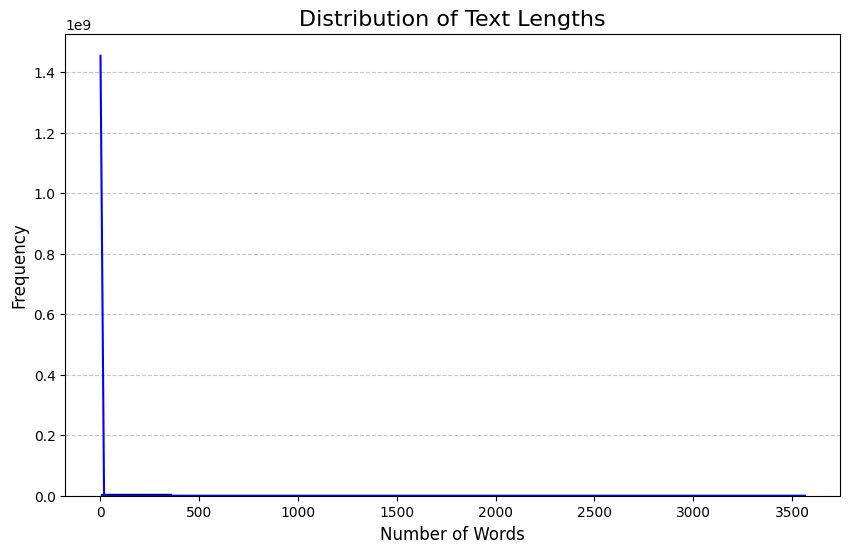

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each 'text'
df['text_length'] = df['text'].str.split().apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=10, kde=True, color='blue', alpha=0.7)

# Add labels and title
plt.title("Distribution of Text Lengths", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Calculate the number of words in each text
df['word_count'] = df['text'].str.split().apply(len)

# Count the number of rows for each word count
word_count_stats = df['word_count'].value_counts().sort_index()

# Optional: Convert statistics to a DataFrame for easier viewing
word_count_stats_df = word_count_stats.reset_index()
word_count_stats_df.columns = ['Word Count', 'Number of Rows']
print("\nStatistics as DataFrame:")
word_count_stats_df


Statistics as DataFrame:


,Word Count,Number of Rows
0,1,5140214
1,2,274310
2,3,138982
3,4,78507
4,5,51338
...,...,...
509,1023,1
510,1086,1
511,1171,1
512,1864,1


# Tiền xử lý dữ liệu

In [ ]:
import re

# Filter rows where word count is 0 or 1
df = df[(df['word_count'] == 0) | (df['word_count'] == 1)]
# Filter rows where 'text' has at least 1 words and is not purely numeric
df = df[(df['text'].str.split().apply(len) >= 1) & (~df['text'].str.strip().str.isdigit())]
df = df.drop(columns = ['text_length', 'word_count'])
# Loại bỏ dấu câu, ký tự đặc biệt, emoji, tab, xuống dòng và dư thừa khoảng trắng
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', re.sub(r'[\n\t\r]', ' ', x)).strip())

df

,course_id,comment_id,text
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的
4,C_936971,Cm_2882939,花姐
...,...,...,...
5971786,C_681619,Cm_13154692,
5971787,C_681619,Cm_13167989,优秀
5971788,C_681619,Cm_13197504,
5971789,C_681619,Cm_13212632,BAAAC


In [ ]:
# Tiền xử lý làm sạch cơ bản
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Loại bỏ dấu câu và ký tự đặc biệt
df['text'] = df['text'].apply(lambda x: x.lower())  # Chuyển tất cả về chữ thường
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))  # Loại bỏ khoảng trắng thừa

In [ ]:
df

,course_id,comment_id,text
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的
4,C_936971,Cm_2882939,花姐
...,...,...,...
5971786,C_681619,Cm_13154692,
5971787,C_681619,Cm_13167989,优秀
5971788,C_681619,Cm_13197504,
5971789,C_681619,Cm_13212632,baaac


## Loại bỏ các dòng có 'text' không có giá trị
- 'text' là Null, None
- 'text' chỉ chứa chữ số, kí tự, dấu,...

In [ ]:
df.isnull().sum()

course_id     0
comment_id    0
text          0
dtype: int64

In [ ]:
df2 = df.copy()
df2

,course_id,comment_id,text
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的
4,C_936971,Cm_2882939,花姐
...,...,...,...
5971786,C_681619,Cm_13154692,
5971787,C_681619,Cm_13167989,优秀
5971788,C_681619,Cm_13197504,
5971789,C_681619,Cm_13212632,baaac


In [ ]:
import pandas as pd
import string

# Giả sử df2 chứa cột 'text'

# Hàm kiểm tra text có hợp lý không
def is_valid_text(text):
    if not isinstance(text, str):  # Không phải chuỗi
        return False
    if len(text.strip()) == 0:  # Rỗng hoặc chỉ chứa khoảng trắng
        return False
    if len(text) == 1 and text.isalpha():  # Chỉ chứa 1 chữ cái
        return False
    if text.isdigit():  # Chỉ chứa chữ số
        return False
    if all(char in string.punctuation for char in text):  # Chỉ chứa dấu câu
        return False
    return True

# Loại bỏ các dòng không hợp lệ
df2 = df2[df2['text'].apply(is_valid_text)]

# Hàm xóa dấu câu trong text
def remove_punctuation(text):
    if not isinstance(text, str):
        return text
    return text.translate(str.maketrans('', '', string.punctuation))

# Xóa dấu câu khỏi các dòng còn lại
df2['text'] = df2['text'].apply(remove_punctuation)

# Kết quả
df2

/tmp/ipykernel_23/1098186287.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text'] = df2['text'].apply(remove_punctuation)


,course_id,comment_id,text
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的
4,C_936971,Cm_2882939,花姐
...,...,...,...
5971783,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应
5971784,C_681619,Cm_12527889,网络问题
5971787,C_681619,Cm_13167989,优秀
5971789,C_681619,Cm_13212632,baaac


### Chuyển kiểu dữ liệu

In [ ]:
df2.dtypes

course_id     object
comment_id    object
text          object
dtype: object

In [ ]:
df2 = df2.copy()
df2['text'] = df2['text'].astype(str)

In [ ]:
df2.dtypes

course_id     object
comment_id    object
text          object
dtype: object

## Loại bỏ stopword Tiếng Trung

In [ ]:
import jieba
import pandas as pd
import re
import requests
from tqdm import tqdm  # Thêm thư viện tqdm để theo dõi tiến trình

# Tải danh sách stopwords từ GitHub
def fetch_stopwords(url):
    response = requests.get(url)
    if response.status_code == 200:
        stopwords = set(response.text.splitlines())
        return stopwords
    else:
        raise Exception(f"Failed to fetch stopwords from {url}")

# Đường dẫn đến stopwords trên GitHub
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt"
stopwords = fetch_stopwords(stopwords_url)

# Hàm loại bỏ stopwords
def remove_stopwords(text, stopwords):
    words = jieba.lcut(text)  # Tách từ bằng jieba
    filtered_words = [word for word in words if word not in stopwords]  # Loại bỏ stopwords
    return ''.join(filtered_words)  # Ghép các từ lại thành chuỗi

# Hàm xóa các dòng chứa 'text' rỗng hoặc chỉ chứa dấu câu
def clean_text(text):
    if not isinstance(text, str):  # Kiểm tra nếu không phải kiểu chuỗi
        return ''
    text = text.strip()  # Loại bỏ khoảng trắng thừa
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ dấu câu
    return text

# Đảm bảo cột 'text' là chuỗi
df2['text'] = df2['text'].astype(str)

# Áp dụng tiến trình với tqdm
tqdm.pandas(desc="Processing text:")  # Thêm mô tả thanh tiến trình

# Làm sạch và loại bỏ stopwords
df2['text_cleaned'] = df2['text'].progress_apply(clean_text).progress_apply(lambda x: remove_stopwords(x, stopwords))

# Xóa các dòng có 'text_cleaned' rỗng
df2 = df2[df2['text_cleaned'].str.strip() != '']

# Hiển thị kết quả
df2

Processing text::   0%|          | 0/4868960 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.661 seconds.
Prefix dict has been built successfully.
Processing text:: 100%|██████████| 4868960/4868960 [04:52<00:00, 16650.53it/s]


,course_id,comment_id,text,text_cleaned
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展,文艺复兴人类史上重要发展史冲击旧思想竞技体育得到发展
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗,几位老师有意思请问这门课考研涉及
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗,几位老师有意思请问这门课考研涉及
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的,奔钢花姐姐创业老师
4,C_936971,Cm_2882939,花姐,花姐
...,...,...,...,...
5971783,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应
5971784,C_681619,Cm_12527889,网络问题,网络问题
5971787,C_681619,Cm_13167989,优秀,优秀
5971789,C_681619,Cm_13212632,baaac,baaac


## Chọn dữ liệu theo courseid
Do các nguyên nhân:
- Mất cân bằng dữ liệu về số lượng comment tại mỗi course (có course chỉ có 1 - 2 thậm chí không có comment nào, nhưng có course lại có tới 1998514 comment như khóa học C_936971)
- Quá tải trong việc dịch thuật cùng gán nhãn dữ liệu
Nhóm lựa chọn lấy comment random tại mỗi khóa học ứng với courseid tương ứng

In [ ]:
df3 = df2.copy()

# Tính số dòng dữ liệu của từng `courseid`
course_count = df3.groupby('course_id').size().reset_index(name='count')

# Đổi tên các cột để dễ hiểu hơn
course_count.columns = ['course_id', 'count']
#Sắp xếp theo thứ tự count giảm dần
course_count = course_count.sort_values(by='count', ascending=False)

# Hiển thị kết quả
course_count.head(5)

,course_id,count
885,C_936971,1998514
60,C_1822804,255980
639,C_735054,165454
755,C_810349,82514
228,C_680823,57592


In [ ]:
course_count.tail(5)

,course_id,count
344,C_682379,1
391,C_682618,1
670,C_735328,1
713,C_766203,1
311,C_682184,1


In [ ]:
course_count[course_count['count'] > 5000].sum()

course_id    C_936971C_1822804C_735054C_810349C_680823C_682...
count                                                  4294772
dtype: object

In [ ]:
import pandas as pd

# Giả sử df2 là DataFrame gốc của bạn
df4 = df2.copy()

# Thêm cột 'count' đếm số lượng dòng dữ liệu cho từng khóa học
df4['count'] = df4.groupby('course_id')['course_id'].transform('count')
df4

,course_id,comment_id,text,text_cleaned,count
0,C_936971,Cm_2703141,文艺复兴是人类史上重要发展史冲击旧思想使竞技体育得到发展,文艺复兴人类史上重要发展史冲击旧思想竞技体育得到发展,1998514
1,C_936971,Cm_2752885,几位老师很有意思请问这门课考研有涉及吗,几位老师有意思请问这门课考研涉及,1998514
2,C_936971,Cm_2752886,几位老师很有意思请问这门课考研有涉及吗,几位老师有意思请问这门课考研涉及,1998514
3,C_936971,Cm_2882843,奔着钢花姐姐和创业老师来的,奔钢花姐姐创业老师,1998514
4,C_936971,Cm_2882939,花姐,花姐,1998514
...,...,...,...,...,...
5971783,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,19
5971784,C_681619,Cm_12527889,网络问题,网络问题,19
5971787,C_681619,Cm_13167989,优秀,优秀,19
5971789,C_681619,Cm_13212632,baaac,baaac,19


In [ ]:
# Lọc ra các khóa học có 'count' > 5000
df_filtered = df4[df4['count'] > 5000]

# Lọc ra các khóa học có 'count' <= 5000
df_other = df4[df4['count'] <= 5000]
df_other

,course_id,comment_id,text,text_cleaned,count
2262102,C_697791,Cm_107399,函数名就是地址吧,函数名地址,3668
2262103,C_697791,Cm_233476,例子中数组b输出的时候为什么是大写的i呀,例子数组b输出大写i,3668
2262105,C_697791,Cm_644759,剩下的属于进阶部分还是有的,剩下属于进阶部分,3668
2262106,C_697791,Cm_680326,梦想中的清华大学可以通过慕课看很开心,梦想清华大学慕课开心,3668
2262107,C_697791,Cm_687487,感谢清华感谢郑教授,感谢清华感谢郑教授,3668
...,...,...,...,...,...
5971783,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,19
5971784,C_681619,Cm_12527889,网络问题,网络问题,19
5971787,C_681619,Cm_13167989,优秀,优秀,19
5971789,C_681619,Cm_13212632,baaac,baaac,19


In [ ]:
import pandas as pd

# Giả sử df2 là DataFrame gốc của bạn
df4 = df2.copy()

# Thêm cột 'count' đếm số lượng dòng dữ liệu cho từng khóa học
df4['count'] = df4.groupby('course_id')['course_id'].transform('count')

# Lọc ra các khóa học có 'count' > 5000
df_filtered = df4[df4['count'] > 5000]

# Lọc ra các khóa học có 'count' <= 5000
df_other = df4[df4['count'] <= 5000]

# Lấy ngẫu nhiên 5000 dòng cho mỗi khóa học có 'count' > 5000
df_filtered_sampled = df_filtered.groupby('course_id').apply(lambda x: x.sample(n=5000, random_state=42) if len(x) > 5000 else x)

# Reset lại index sau khi nhóm và lấy mẫu
df_filtered_sampled = df_filtered_sampled.reset_index(drop=True)

# Kết hợp các khóa học có 'count' > 5000 đã được lấy mẫu và các khóa học có 'count' <= 5000
df5 = pd.concat([df_filtered_sampled, df_other])

# Reset lại index cuối cùng
df5 = df5.reset_index(drop=True)
df5['count'] = df5.groupby('course_id')['course_id'].transform('count')

# Hiển thị kết quả
df5

/tmp/ipykernel_23/3751101152.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered_sampled = df_filtered.groupby('course_id').apply(lambda x: x.sample(n=5000, random_state=42) if len(x) > 5000 else x)


,course_id,comment_id,text,text_cleaned,count
0,C_1641662,Cm_4606995,良好的教师职业道德对学生影响很大具体分为身体健康影响和心理健康影响良好的教师职业道德将会促使...,良好教师职业道德学生影响很大具体分为身体健康影响心理健康影响良好教师职业道德将会促使学生积极...,5000
1,C_1641662,Cm_13487510,文化的影响,文化影响,5000
2,C_1641662,Cm_10338533,为人师表以身作则,为人师表以身作则,5000
3,C_1641662,Cm_11398691,教书育人,教书育人,5000
4,C_1641662,Cm_6149788,爱国守法依法治教以人为本,爱国守法依法治教以人为本,5000
...,...,...,...,...,...
1106964,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,19
1106965,C_681619,Cm_12527889,网络问题,网络问题,19
1106966,C_681619,Cm_13167989,优秀,优秀,19
1106967,C_681619,Cm_13212632,baaac,baaac,19


In [ ]:
df5['count'] = df5.groupby('course_id')['course_id'].transform('count')
df5

,course_id,comment_id,text,text_cleaned,count
0,C_1641662,Cm_4606995,良好的教师职业道德对学生影响很大具体分为身体健康影响和心理健康影响良好的教师职业道德将会促使...,良好教师职业道德学生影响很大具体分为身体健康影响心理健康影响良好教师职业道德将会促使学生积极...,5000
1,C_1641662,Cm_13487510,文化的影响,文化影响,5000
2,C_1641662,Cm_10338533,为人师表以身作则,为人师表以身作则,5000
3,C_1641662,Cm_11398691,教书育人,教书育人,5000
4,C_1641662,Cm_6149788,爱国守法依法治教以人为本,爱国守法依法治教以人为本,5000
...,...,...,...,...,...
1106964,C_681619,Cm_12527821,edta难纯化易和水体中金属离子反应,edta难纯化易水体金属离子反应,19
1106965,C_681619,Cm_12527889,网络问题,网络问题,19
1106966,C_681619,Cm_13167989,优秀,优秀,19
1106967,C_681619,Cm_13212632,baaac,baaac,19


## Lưu thành file csv

In [ ]:
df5 = df5.drop(columns = ['count'])
output_path = '/kaggle/working/cleaned_comments.csv'
df5.to_csv(output_path, index=False)

## Lưu thành các file nhỏ
Đảm bảo chia không tách

In [ ]:
import pandas as pd
import os

# Tạo thư mục để lưu các file nhỏ
output_folder = '/kaggle/working/cleaned_comments'
os.makedirs(output_folder, exist_ok=True)

# Nhóm dữ liệu theo 'course_id'
grouped = df5.groupby('course_id')

# Chia nhóm thành 30 phần
chunks = 30
chunk_size = len(grouped) // chunks  # Kích thước mỗi phần
chunked_groups = [group for _, group in grouped]

# Nếu không chia hết, phần còn lại sẽ được thêm vào
chunks = [chunked_groups[i:i + chunk_size] for i in range(0, len(chunked_groups), chunk_size)]

# Lưu từng phần vào file CSV
for i, chunk in enumerate(chunks):
    chunk_df = pd.concat(chunk)
    chunk_df.to_csv(f'{output_folder}/file_{i+1}.csv', index=False)

print(f'Đã lưu {len(chunks)} file dữ liệu vào thư mục {output_folder}')

Đã lưu 31 file dữ liệu vào thư mục /kaggle/working/cleaned_comments


In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Đường dẫn thư mục chứa các file đã chia nhỏ
output_folder = '/kaggle/working/cleaned_comments'

# Lấy danh sách tất cả các file CSV trong thư mục
file_list = [f for f in os.listdir(output_folder) if f.endswith('.csv')]

# Dùng defaultdict để lưu trữ thông tin về file chứa các 'course_id'
course_id_in_files = defaultdict(list)

# Duyệt qua từng file và lưu trữ thông tin
for file in file_list:
    file_path = os.path.join(output_folder, file)

    # Đọc file CSV
    df = pd.read_csv(file_path)

    # Lấy các 'course_id' duy nhất trong file này
    course_ids = df['course_id'].unique()

    # Lưu 'course_id' vào danh sách của các file chứa chúng
    for course_id in course_ids:
        course_id_in_files[course_id].append(file)

# Kiểm tra và in ra các 'course_id' xuất hiện trong >= 2 file
course_id_multiple_files = {course_id: files for course_id, files in course_id_in_files.items() if len(files) > 1}

# Hiển thị kết quả
if course_id_multiple_files:
    print("Các 'course_id' xuất hiện trong >= 2 file:")
    for course_id, files in course_id_multiple_files.items():
        print(f"Course ID: {course_id} - Xuất hiện trong các file: {files}")
else:
    print("Không có 'course_id' nào xuất hiện trong >= 2 file.")

Không có 'course_id' nào xuất hiện trong >= 2 file.
